In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [28]:
xls = pd.ExcelFile('/Users/asheshlalshrestha/Desktop/UB/Research/CarePathways/Models/Datasets/PhyAdRsnComorbMed.xlsx')
df1 = pd.read_excel(xls, 'Hospital-length-of-stay')
df3 = pd.read_excel(xls, 'Data-at-admission')

### Dataset for the length of stay

In [29]:
df1.head()

,id,parent_id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative
0,1,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN
1,2,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,3,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
3,4,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
4,5,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN


In [30]:
df1.shape

(508, 11)

### Droping id from df1 and renaming parent_id to id as we will be matching both the dataframe on the basis of parent_id

In [31]:
df1 = df1.drop('id',axis=1)
df1.rename(columns={'parent_id': 'id'}, inplace=True)

In [32]:
df1.head()

,id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative
0,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN
1,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
3,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
4,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN


### Dataset for data at admission

In [33]:
df3.head()

,id,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,74,1,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,61,0,154.9,73.6,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,58,0,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,94,1,182.8,66.2,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,91,1,NaN,NaN,1.0,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [34]:
df3.shape

(508, 750)

### Matching the hospital length of stay with the data at admission on the basis of id

In [35]:
df3 = pd.merge(df1, df3,on='id', how='inner')

In [36]:
df3

,id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,517,Yes,NaN,19.0,19,6.0,13.0,5.0,15.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
504,519,No,NaN,NaN,9,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
505,521,No,NaN,NaN,7,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,522,No,NaN,NaN,5,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the id and other columns from as it is not necessary

In [ ]:
df3['d']

In [12]:
cols_to_drop = ['did_the_patient_expire_in_hospital',
       'reason_for_death', 'days_in_hospital_prior_to_expiration',
        'icu_length_of_stay',
       'days_in_hospital_prior_to_icu_admission',
       'time_on_mechanical_ventilation',
       'days_in_hospital_prior_to_mechanical_ventilation',
       'days_to_first_covid19_test_negative']
df3 = df3.drop(cols_to_drop,axis=1)

In [13]:
# df3.to_csv("Datasets/new.csv")

In [14]:
# df3 = df3.drop("id",axis=1)

In [15]:
df3.head()

,id,did_the_patient_expire_in_hospital,hospital_length_of_stay,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,Yes,21,74,1,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,No,5,61,0,154.9,73.6,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,No,7,58,0,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,Yes,9,94,1,182.8,66.2,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,Yes,9,91,1,NaN,NaN,1.0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Thus df3 becomes our final dataset on which we will be preprocessing and making the model
#### Counting the null values
We can see that there are null values in 
1. height
2. weight
3. smoking_history
4. year_they_quit
5. Rest of the morbid conditions

In [16]:
null_counts = df3.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

height                                                  236
weight                                                  150
smoking_history                                         430
year_they_quit                                          247
Tylenol Extra Strength                                    2
                                                       ... 
Cogentin Tab                                              2
Elavil                                                    2
Rybelsus                                                508
Prozac Capsules                                         508
Methylprednisolone Acetate Injectable Suspension Usp    508
Length: 700, dtype: int64


In [17]:
df3.isnull().sum().reset_index(name='counts').sort_values(by='counts',ascending=False)

,index,counts
751,Methylprednisolone Acetate Injectable Suspensi...,508
750,Prozac Capsules,508
749,Rybelsus,508
7,smoking_history,430
8,year_they_quit,247
...,...,...
36,reason_for_admission_Coronavirus infection [B3...,0
35,reason_for_admission_COVID-19 with multiple co...,0
34,reason_for_admission_COVID-19 virus infection ...,0
33,reason_for_admission_COVID-19 determined by cl...,0


## Data cleaning

#### We will handle the null values in height and weight with the mean values and the null values in smoking history will be handled by entering 0 as 1 means they have a history

In [18]:
df3['height'] = df3['height'].fillna(df3['height'].mean())
df3['weight'] = df3['weight'].fillna(df3['weight'].mean())
df3['smoking_history']=df3['smoking_history'].fillna(0)

### We are droping year_they_quit as they have no significance and rest of the tables as they have no values for the 508 rows

In [19]:
df3 = df3.drop(['year_they_quit','Methylprednisolone Acetate Injectable Suspension Usp','Prozac Capsules','Rybelsus'],axis=1)

In [20]:
a = df3.isnull().sum().reset_index(name='Null counts')
a

,index,Null counts
0,id,0
1,did_the_patient_expire_in_hospital,0
2,hospital_length_of_stay,0
3,age,0
4,sex,0
...,...,...
743,Desvenlafaxine,2
744,Glucosamine,2
745,Turmeric,2
746,Cogentin Tab,2


### Dropped the null rows as only Elavil had 2 rows that had null values

In [21]:
df3 = df3.dropna()

### Now we can see that there are no null values

In [22]:
null_counts = df3.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

Series([], dtype: int64)

In [23]:
a = df3.isnull().sum().reset_index(name='Null counts')
a

,index,Null counts
0,id,0
1,did_the_patient_expire_in_hospital,0
2,hospital_length_of_stay,0
3,age,0
4,sex,0
...,...,...
743,Desvenlafaxine,0
744,Glucosamine,0
745,Turmeric,0
746,Cogentin Tab,0


In [24]:
df3

,id,did_the_patient_expire_in_hospital,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,Yes,21,74,1,166.911029,80.265922,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No,5,61,0,154.900000,73.600000,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,No,7,58,0,166.911029,80.265922,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Yes,9,94,1,182.800000,66.200000,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Yes,9,91,1,166.911029,80.265922,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,No,2,56,0,165.000000,72.600000,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,516,No,13,74,0,166.911029,55.000000,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,517,Yes,19,81,1,158.000000,65.000000,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,No,9,74,1,166.911029,81.700000,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# df3.to_csv("Datasets/new.csv")

In [93]:
column_names_df = pd.DataFrame(df3.columns, columns=['Column Names'])
column_names_df.to_csv("Datasets/newcsv_columns.csv")

### Standarizing the dataset where we will only standarize the three columns:
1. age
2. height
3. weight

In [25]:
columns_to_standardize = ['age', 'height', 'weight']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])

### Scaled dataset

In [26]:
df3.head()

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,21,0.485152,1,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,-0.491182,0,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,9,1.705571,1,1.989114,-0.766671,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,9,1.522508,1,0.003233,0.001623,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# df3.to_csv("Datasets/preprocessed_dataset.csv")

### Splitting train and test dataset
1. y is the Target variable which is the 'hospital_length_of_stay'
2. X will be everything except the target variable

In [28]:
from sklearn.model_selection import train_test_split

X = df3.drop('hospital_length_of_stay', axis =1)

y = df3.hospital_length_of_stay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Testing for the principal component ananlysis

In [29]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 8)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                                      

[[-2.58846428e+02 -6.11961599e-01  9.88792014e-01 ...  1.90025881e-01
  -1.46729572e-01  2.35970643e-01]
 [-2.57845924e+02 -1.15704909e+00 -9.62629886e-01 ...  1.27758292e+00
  -4.27749164e-01  4.72127488e-01]
 [-2.56846397e+02  7.33967811e-02 -3.37799156e-01 ...  1.28313304e+00
  -8.33911014e-01  1.92580981e-01]
 ...
 [ 2.57151478e+02 -1.48484118e+00 -1.50380381e-01 ... -1.60374750e+00
   5.90375760e-01 -3.61546894e-02]
 [ 2.59151179e+02 -2.35668927e-02  2.14022099e-01 ... -1.36113446e+00
   3.32865583e-01  8.75736691e-01]
 [-2.47848140e+02 -1.18619449e+00  1.30558874e-01 ... -4.16770929e-01
  -5.75992741e-01 -1.78809547e-01]]
(506, 8)


In [30]:
## total pca numbers initially
PC_number = np.arange(pca.n_components_) + 1 
print(PC_number)                                                        

[1 2 3 4 5 6 7 8]


In [31]:
#tract proportion of explained variance
var = pca.explained_variance_ 
# we will get 10 value of explained variance
print(var)

[2.25310536e+04 1.71018262e+00 9.61497097e-01 6.45976508e-01
 3.45784198e-01 2.83741130e-01 2.14378883e-01 2.02260939e-01]


### Plotting the graph for explained variance vs the number of components

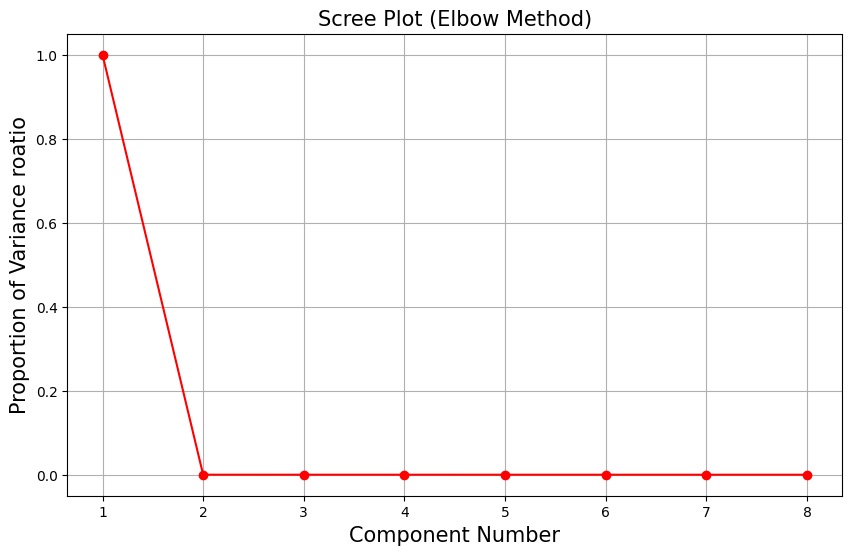

0.9997205661587137

In [32]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))                          
plt.plot(PC_number,                                  
         explained_variance_ratios,
         'ro-')
plt.title('Scree Plot (Elbow Method)',       
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance roatio',
           fontsize = 15)
plt.grid()                                                       
plt.show()        
sum(explained_variance_ratios)

In [33]:
explained_variance_ratios

array([9.99526977e-01, 7.58674537e-05, 4.26541209e-05, 2.86569353e-05,
       1.53397458e-05, 1.25873791e-05, 9.51031766e-06, 8.97273907e-06])

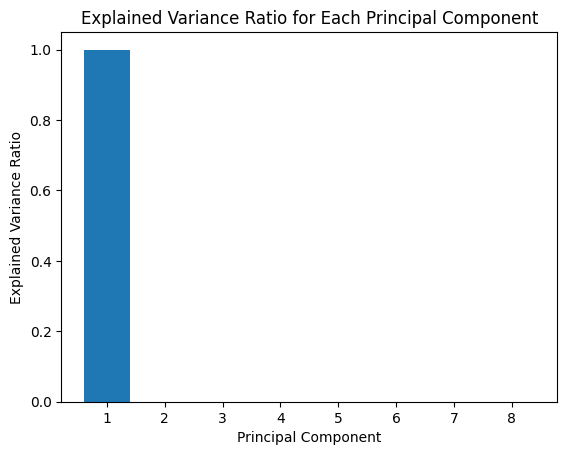

In [34]:
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Creating a model, initially for lasso regression

In [35]:
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 173.96962087632966


### Getting the importance of the features that is defined by the coeffecients distributed by lasso regression

In [36]:
# Get feature importances from coefficients
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

feature_importances 

,Feature,Importance
497,Lansoprazole,28.750836
555,Isordil,18.671330
124,Polyethylene Glycol,8.646427
7,admission_disposition,4.680058
13,Kidney disease,4.363456
...,...,...
273,Tresiba,0.000000
274,Ralivia,0.000000
275,Ventolin Hfa,0.000000
277,Lyrica,0.000000


### Important features are those which have importance of more than 0

In [37]:
# Print feature importances
important_features = feature_importances[feature_importances['Importance']>0]
important_features

,Feature,Importance
497,Lansoprazole,28.750836
555,Isordil,18.671330
124,Polyethylene Glycol,8.646427
7,admission_disposition,4.680058
13,Kidney disease,4.363456
86,Amlodipine,4.212088
186,Avapro,3.288704
81,Bisoprolol,2.997829
37,reason_for_admission_Fever of unknown origin [...,2.988895
10,Diabetes,2.721210


### Dropping the unimportant features from X

In [38]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_lasso = X.drop(cols_to_drop,axis=1)

### Our new_x_for_lasso will have features that do have only 37 columns

In [39]:
new_x_for_lasso

,id,age,sex,height,previous_er_visit_within_14_days,admission_disposition,Hypertension,Diabetes,Other,Kidney disease,...,Ezetrol,Prednisone,Atacand,Allopurinol,Cipralex,Calcitriol,Tylenol W Codeine No Tab,Aricept,Lansoprazole,Isordil
0,1,0.485152,1,0.003233,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-0.308119,0,-1.497964,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.491182,0,0.003233,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.705571,1,1.989114,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.522508,1,0.003233,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,-0.613224,0,-0.235617,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,516,0.485152,0,0.003233,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,517,0.912299,1,-1.110511,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,0.485152,1,0.003233,1,1,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the new df 
we can see that we are getting the same mse with lesser number of features

In [40]:
X_train, X_test, y_train, y_test = train_test_split(new_x_for_lasso, y, test_size=0.3, random_state=42)

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 173.96962062833327


### Again conducting pca in the new df

In [41]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(new_x_for_lasso)     # Transform data
print(pca_trans)                                                  # Print transformed data
print(pca_trans.shape)                                      # Print dimensions of transformed data

[[-2.58847542e+02  6.58718427e-01  6.77202741e-01 ...  3.94491338e-01
  -4.47555483e-01 -5.63562522e-01]
 [-2.57847038e+02  1.10585883e+00 -1.18692681e+00 ...  1.66101887e-01
  -2.49575454e-02 -4.44934618e-02]
 [-2.56847561e+02 -1.18681692e-01 -3.34011323e-01 ... -3.68886166e-02
  -1.91786246e-02  6.95155470e-03]
 ...
 [ 2.57152721e+02  1.26271268e+00 -7.72929674e-02 ...  5.96319132e-02
  -2.65779225e-01  2.13076695e-01]
 [ 2.59152154e+02  1.16627053e-01  2.84894203e-01 ...  4.26120770e-01
  -4.23228088e-01 -2.70121123e-01]
 [-2.47847258e+02  1.21171966e+00  3.63063599e-02 ...  1.28444984e-01
   5.92630984e-02  1.42753633e-01]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.9997967648173248
Component 2: 5.766256157379023e-05
Component 3: 3.9679697593022434e-05
Component 4: 1.33185499814748e-05
Component 5: 9.33499469196213e-06
Component 6: 7.7031489673002e-06
Component 7: 6.921208500303177e-06
Component 8: 6.832235415440685e-06
Component 9: 6.191382841229448e-06
Component 10: 5.6059855174769025e-06
Component 11: 4.838158233541656e-06
Component 12: 3.944309754343404e-06
Component 13: 3.5501638006756383e-06
Component 14: 3.3355797950795952e-06
Component 15: 3.1339644284669253e-06


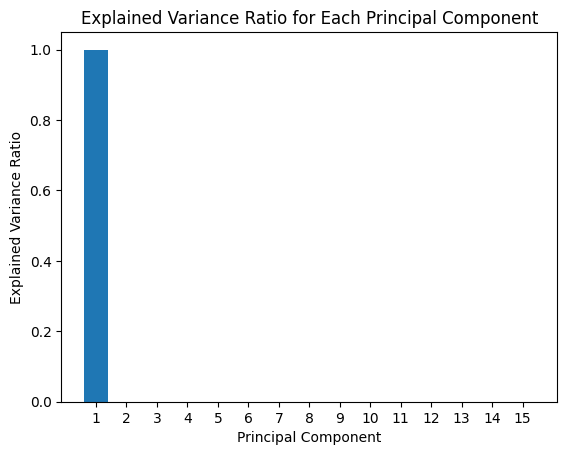

In [42]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Fitting the reduced dimension values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [44]:
# Train the model using the training data
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 166.41801887177348


### Hyperparameter tuning for lasso

In [45]:
lasso = Lasso()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Perform grid search using cross-validation (CV)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Use the best hyperparameters to fit the model
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lasso.predict(X_train))
mse_test = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 0.01
Train MSE: 111.1491314631521
Test MSE: 165.50160716148258


### We will deep dive into classificaion modeling
1. We will see the stats in the target variable which is hospital length of stay
2. We can see that the mean is 12 days

In [46]:
df4 = df3
df4

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,21,0.485152,1,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,-0.491182,0,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,9,1.705571,1,1.989114,-0.766671,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,9,1.522508,1,0.003233,0.001623,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,2,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,516,13,0.485152,0,0.003233,-1.378426,0.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,517,19,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,9,0.485152,1,0.003233,0.079954,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
df4['hospital_length_of_stay'].describe()

count    506.000000
mean      12.458498
std       11.918837
min        1.000000
25%        5.000000
50%        8.500000
75%       15.000000
max       81.000000
Name: hospital_length_of_stay, dtype: float64

### Anything above 12 days will be 1 and anything below will be 0
Which means that 1 is a long stay and 0 is a short stay

In [48]:
df4['hospital_length_of_stay'] = df4['hospital_length_of_stay'].apply(lambda x: 1 if x > 12 else 0)

In [49]:
df4['hospital_length_of_stay'].value_counts()

0    350
1    156
Name: hospital_length_of_stay, dtype: int64

### Initally we will use the logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.5723684210526315


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Conducting PCA

In [51]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 15)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                       

[[-2.58846428e+02 -6.11961599e-01  9.88792011e-01 ... -2.48124857e-01
  -3.40568751e-01 -5.29114905e-02]
 [-2.57845924e+02 -1.15704909e+00 -9.62629880e-01 ... -3.32805612e-01
  -7.89700012e-02 -6.31933700e-02]
 [-2.56846397e+02  7.33967811e-02 -3.37799158e-01 ...  9.81197287e-02
   2.31948666e-01 -4.61310009e-01]
 ...
 [ 2.57151478e+02 -1.48484118e+00 -1.50380371e-01 ... -3.81175436e-01
   5.14087481e-01  1.83162927e-01]
 [ 2.59151179e+02 -2.35668926e-02  2.14022101e-01 ... -3.57443053e-01
   7.01851904e-01  3.49499819e-01]
 [-2.47848140e+02 -1.18619449e+00  1.30558875e-01 ... -9.93797564e-02
  -3.05077655e-02 -2.15005571e-01]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.9995269774671308
Component 2: 7.586745373956991e-05
Component 3: 4.265412094695439e-05
Component 4: 2.865693528978033e-05
Component 5: 1.5339745856886696e-05
Component 6: 1.2587382046020354e-05
Component 7: 9.510336455080697e-06
Component 8: 8.972885733445425e-06
Component 9: 8.130325762533145e-06
Component 10: 7.649985349219306e-06
Component 11: 7.424655072557959e-06
Component 12: 6.577291607278165e-06
Component 13: 6.0980015311663035e-06
Component 14: 5.83375502059481e-06
Component 15: 5.493603749090501e-06


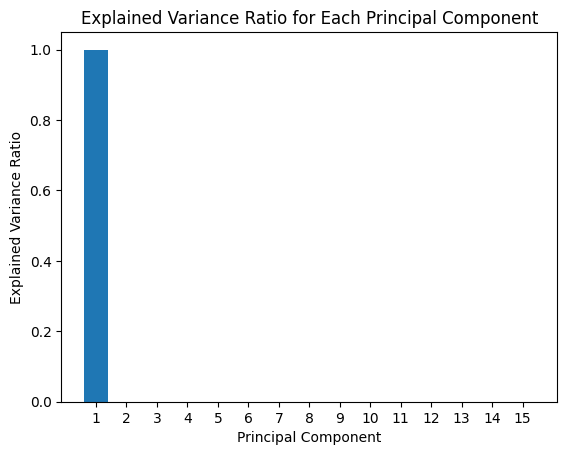

In [52]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [54]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.625


### Feature importance

In [55]:
X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Get the coefficients (importance) of each feature
coefficients = model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient
0,id,0.000670
1,age,0.719067
2,sex,0.500917
3,height,-0.238656
4,weight,-0.022964
...,...,...
741,Desvenlafaxine,-0.060451
742,Glucosamine,-0.087555
743,Turmeric,0.000000
744,Cogentin Tab,0.000000


### Important features

In [56]:
# Print feature importances
important_features = feature_importance_df[feature_importance_df['Coefficient']!=0].sort_values(by='Coefficient',ascending=False)
important_features

,Feature,Coefficient
127,Acetaminophen Tab,1.348576
13,Kidney disease,1.157424
184,Olmetec,1.001614
189,Ezetrol,0.932341
258,Cipralex,0.918777
...,...,...
81,Bisoprolol,-0.853402
275,Ventolin Hfa,-0.906441
36,reason_for_admission_Fever [R50.9],-0.946656
7,admission_disposition,-1.014008


### Removing unimportant features

In [57]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_logistic = X.drop(cols_to_drop,axis=1)

### New X for logistic regression

In [58]:
new_x_for_logistic

,id,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Lectopam Tab,Ipratropium Bromide,Salbutamol Hfa,Muscle &Amp; Back Pain Relief Caplets,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Elavil
0,1,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,516,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,517,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,0.485152,1,0.003233,0.079954,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(new_x_for_logistic, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.5723684210526315


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Conducting PCA on the new X

In [60]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      
pca_trans = pca.fit_transform(new_x_for_logistic)     
print(pca_trans)                                                 
print(pca_trans.shape)                                  

[[-2.58846424e+02 -6.10974241e-01  9.80208993e-01 ... -2.73850531e-01
  -3.17742912e-01 -5.76812981e-02]
 [-2.57845926e+02 -1.15733566e+00 -9.62799368e-01 ... -3.33644401e-01
  -7.65407735e-02 -7.16663789e-02]
 [-2.56846399e+02  7.33559130e-02 -3.37698427e-01 ...  1.02387259e-01
   2.30313999e-01 -4.64314697e-01]
 ...
 [ 2.57151482e+02 -1.48529523e+00 -1.50048937e-01 ... -3.84079061e-01
   5.19368994e-01  1.55621225e-01]
 [ 2.59151183e+02 -2.37924181e-02  2.14256459e-01 ... -3.52623175e-01
   7.13961186e-01  3.47484802e-01]
 [-2.47848142e+02 -1.18642657e+00  1.30731429e-01 ... -9.70185027e-02
  -2.50545876e-02 -2.26089302e-01]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.9995409686289269
Component 2: 7.584451291285788e-05
Component 3: 4.263128960161666e-05
Component 4: 2.863464371984793e-05
Component 5: 1.531398548611986e-05
Component 6: 1.2558108897211655e-05
Component 7: 9.480422436390705e-06
Component 8: 8.932256809568437e-06
Component 9: 8.09308893674089e-06
Component 10: 7.609250620522702e-06
Component 11: 7.39457995991624e-06
Component 12: 6.540952731823868e-06
Component 13: 6.062307428503155e-06
Component 14: 5.807230709772059e-06
Component 15: 5.453853433743392e-06


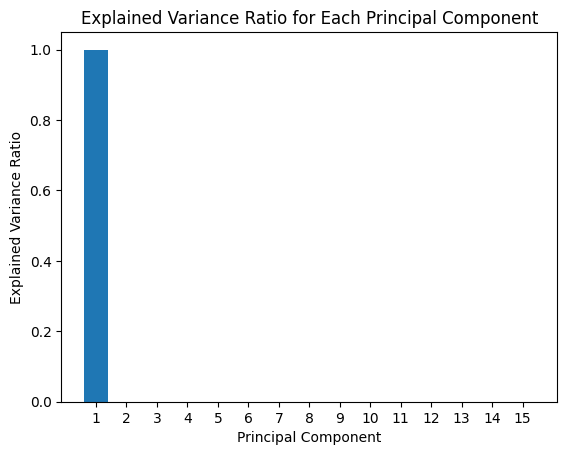

In [61]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [62]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.625


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculating the feature importance

In [63]:
df4

,id,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,1,1,0.485152,1,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,-0.491182,0,0.003233,0.001623,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,1.705571,1,1.989114,-0.766671,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,1.522508,1,0.003233,0.001623,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,515,0,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,516,1,0.485152,0,0.003233,-1.378426,0.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,517,1,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,519,0,0.485152,1,0.003233,0.079954,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
from sklearn.ensemble import RandomForestClassifier


X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

f_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance',ascending=False)

feature_importances

NameError: name 'rf_classifier' is not defined

In [ ]:
sorted_indices

### Using random forest classifier on the original dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

### Using rf on the PCA reduced dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
## how to handle the missing value such as missing year for smoking
## how to handle should we reduce the dimension of the rows as there are 747 columns
## are we using logistic regression to predict a classified dependent variable if yes then how are we to classifiy

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


In [ ]:
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor and hyperparameter distributions
rf_regressor = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Best Model:", mse)


In [ ]:
c_space = np.logspace(-5, 8, 15)

In [ ]:
c_space